# 6. WTT Stars Spectral Energy Distributions

## 6.1. Notebook setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 6.2. <a href="https://www.dropbox.com/sh/hkkdw1pdpt76kfb/AACVh44utUvSsedKgkMG8UeJa?dl=0">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── HD283572_data.txt
│   ├── HD283572_Ipwr_models.txt
│   ├── HD283572_Ith_models.txt
│   ├── HD283572_Vpwr_models.txt
│   ├── HD283572_Vth_models.txt
│   ├── model_sed_freqs.txt
│   ├── thermal-gs.mplstyle
│   ├── V410Tau_data.txt
│   ├── V410Tau_Ipwr_models.txt
│   ├── V410Tau_Ith_models.txt
│   ├── V410Tau_Vpwr_models.txt
│   ├── V410Tau_Vth_models.txt
│   ├── ...
├── figures
│   ├── HD283572_SED.pdf
│   ├── HD283582_SED.png
│   ├── V410Tau_SED.pdf
│   ├── V410Tau_SED.png
│   ├── ...
├── notebooks
│   ├── wtt_seds.ipynb
│   ├── ...
.
.
.

## 6.3. Load

In [2]:
freqs_model = np.loadtxt('../data/model_sed_freqs.txt').T
V4_Ipwr_models = np.loadtxt('../data/V410Tau_Ipwr_models.txt')
V4_Vpwr_models = np.loadtxt('../data/V410Tau_Vpwr_models.txt')
V4_Ith_models = np.loadtxt('../data/V410Tau_Ith_models.txt')
V4_Vth_models = np.loadtxt('../data/V410Tau_Vth_models.txt')
freqs_obs, V4_I_obs, V4_sI_obs, V4_V_obs, V4_sV_obs = np.loadtxt('../data/V410Tau_data.txt', unpack=True)

HD_Ipwr_models = np.loadtxt('../data/HD283572_Ipwr_models.txt')
HD_Vpwr_models = np.loadtxt('../data/HD283572_Vpwr_models.txt')
HD_Ith_models = np.loadtxt('../data/HD283572_Ith_models.txt')
HD_Vth_models = np.loadtxt('../data/HD283572_Vth_models.txt')
freqs_obs, HD_I_obs, HD_sI_obs, HD_V_obs, HD_sV_obs = np.loadtxt('../data/HD283572_data.txt', unpack=True)

plt.style.use('../data/thermal-gs.mplstyle')

## 6.4. Plot

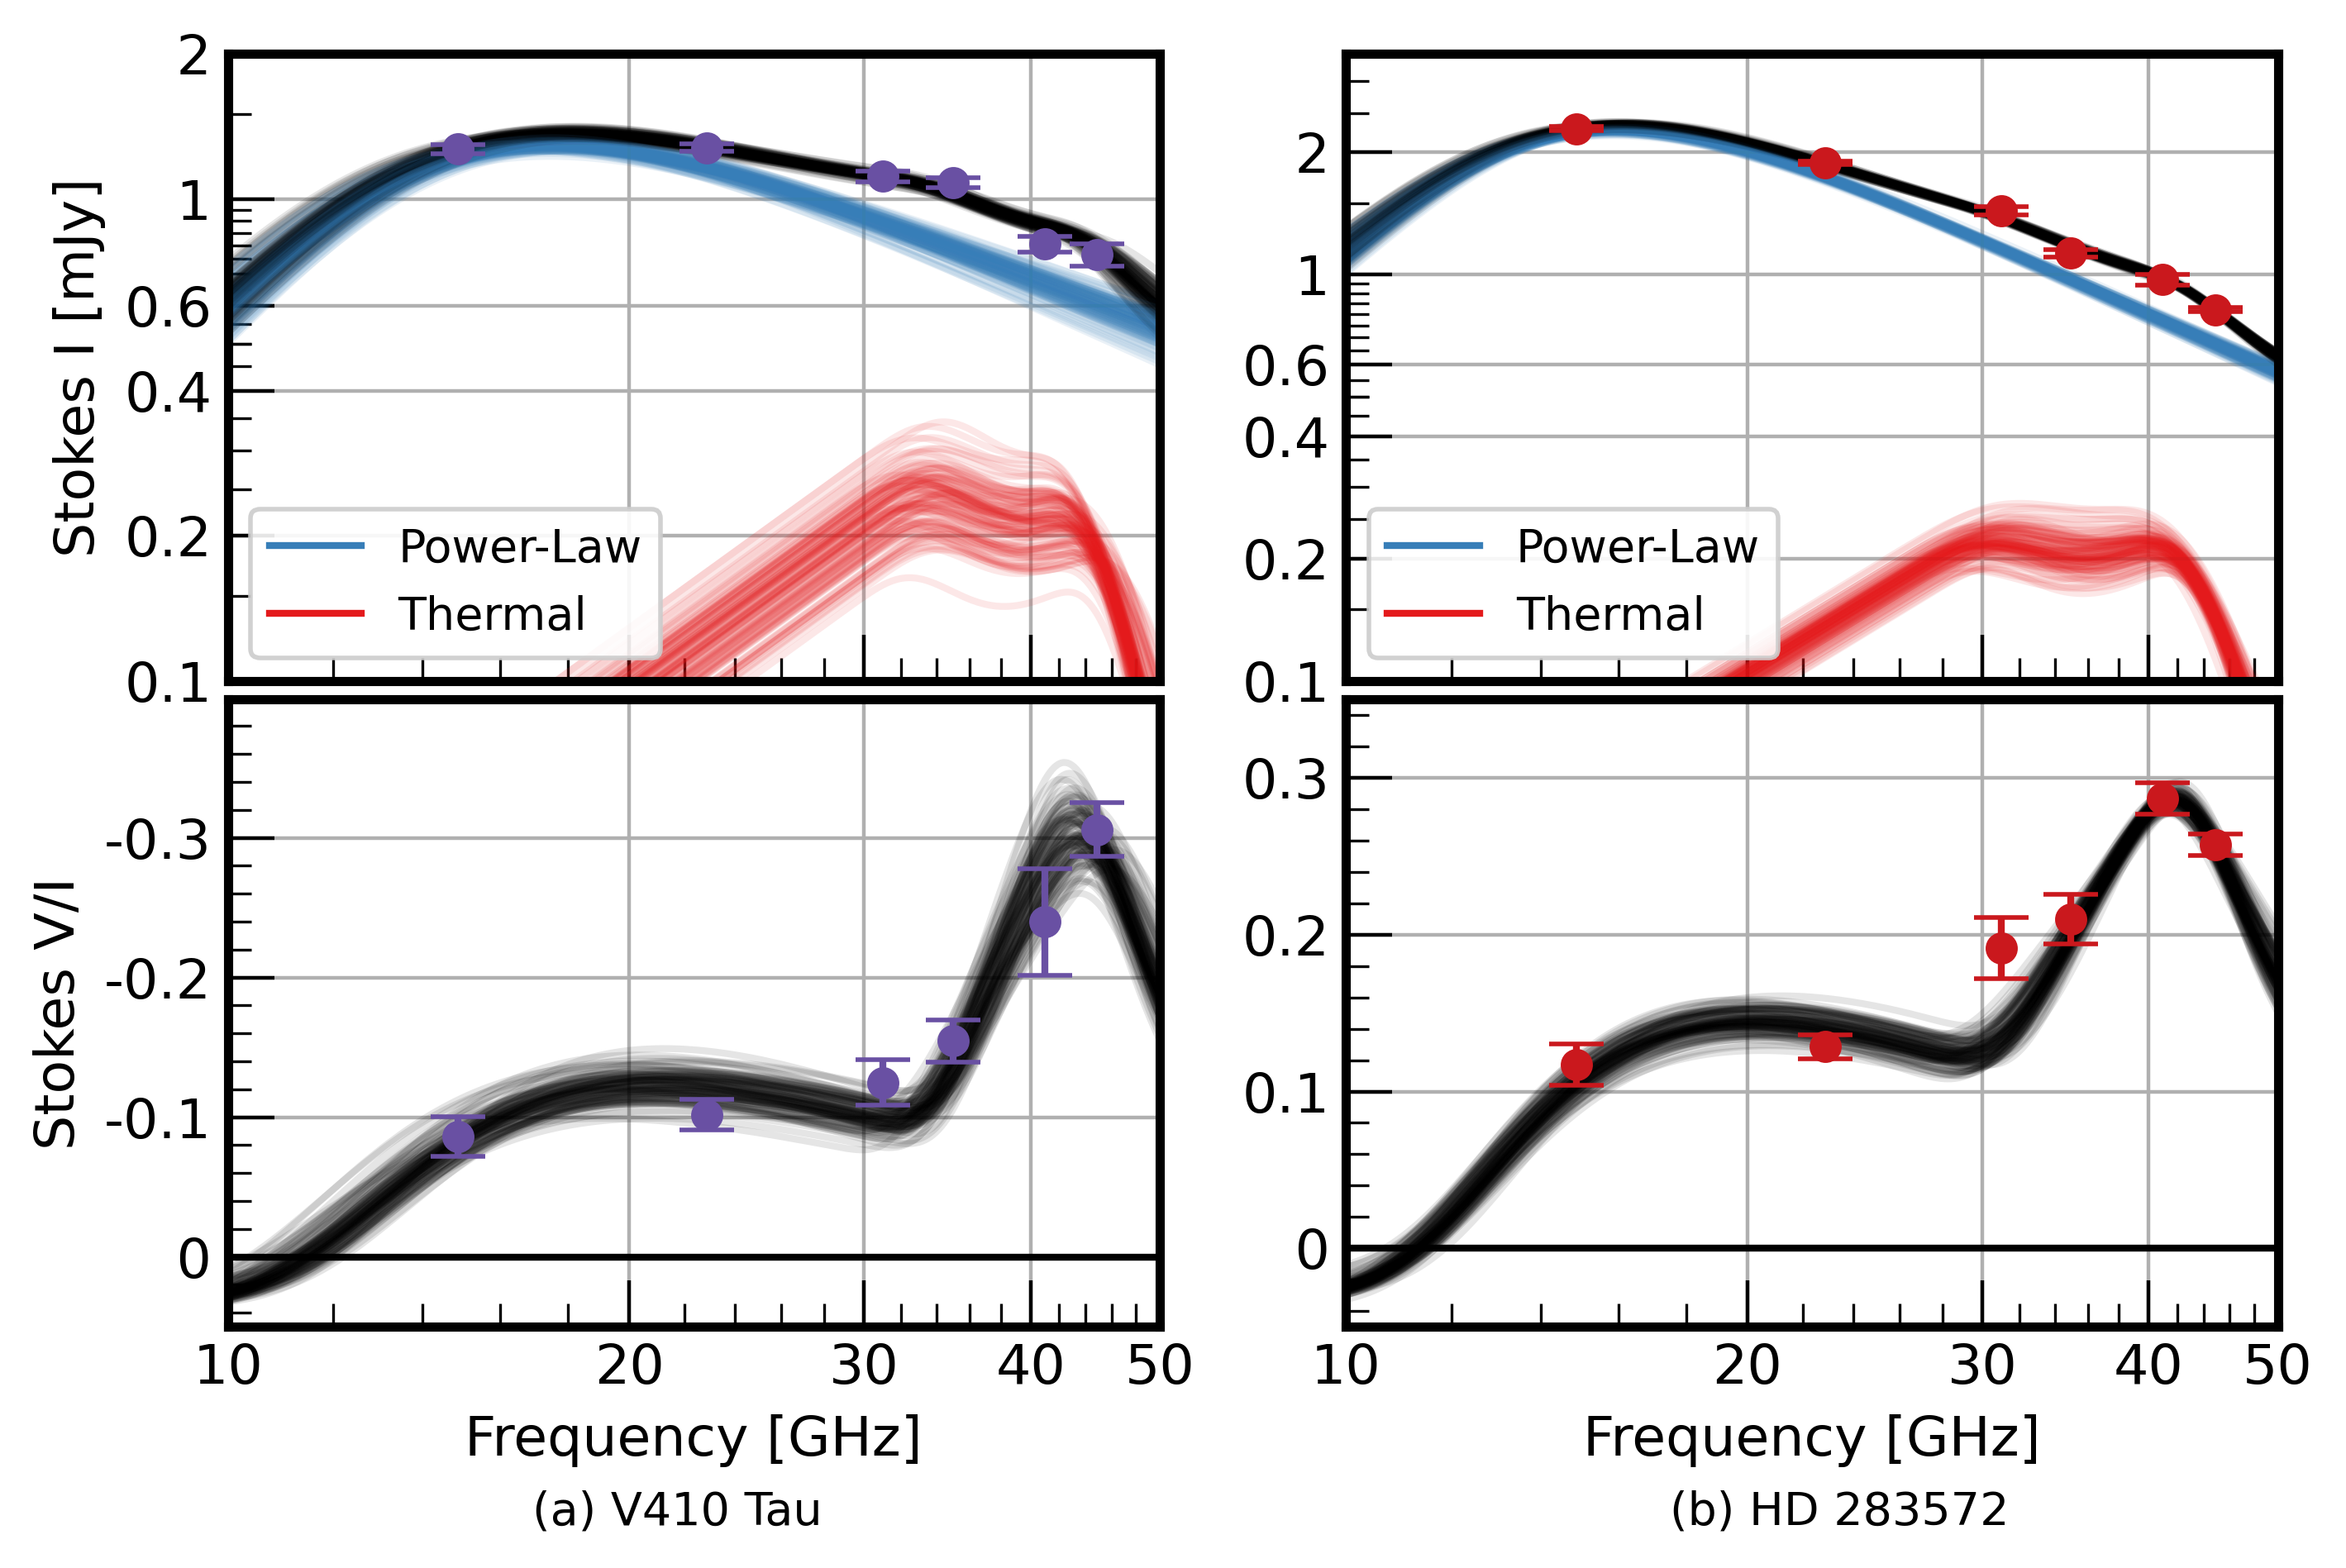

In [3]:
fig,ax = plt.subplots(2, 2, figsize=(8, 5), sharex=True)
fig.subplots_adjust(hspace=0.03, wspace=0.2)

# V410 Tau
cmap = mpl.cm.get_cmap('Purples')

# Stokes I  
ax[0][0].set_ylabel('Stokes I [mJy]')
ax[0][0].set_xlim(10, 50)
ax[0][0].set_ylim(0.1, 2)

ax[0][0].set_xscale('log')
ax[0][0].set_yscale('log')
ax[0][0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0][0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0][0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0][0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0][0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[0][0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[0][0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[0.2, 0.4, 0.6, 1]))
ax[0][0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=20, subs=np.arange(1, 20)*0.05))
ax[0][0].grid()

for i in range(len(V4_Ipwr_models)):
    ax[0][0].plot(freqs_model, V4_Ipwr_models[i]+V4_Ith_models[i], color='black', alpha=0.1)
    ax[0][0].plot(freqs_model, V4_Ipwr_models[i], color='C0', alpha=0.1, label='Power-Law')
    ax[0][0].plot(freqs_model, V4_Ith_models[i], color='C1', alpha=0.1, label='Thermal')
ax[0][0].errorbar(freqs_obs, V4_I_obs, yerr=V4_sI_obs, marker='o', color=cmap(0.75), linestyle='')

# Stokes V/I
ax[1][0].axhline(y=0, color='black')
ax[1][0].set_xlabel('Frequency [GHz]')
ax[1][0].set_ylabel('Stokes V/I')
ax[1][0].set_ylim(0.05, -0.399)

ax[1][0].set_xscale('log')
ax[1][0].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1][0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1][0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1][0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1][0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[1][0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[1][0].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax[1][0].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax[1][0].grid()

for i in range(len(V4_Vpwr_models)):
    ax[1][0].plot(freqs_model, (V4_Vpwr_models[i]+V4_Vth_models[i])/(V4_Ipwr_models[i]+V4_Ith_models[i]), color='black', alpha=0.1)
ax[1][0].errorbar(freqs_obs, V4_V_obs/V4_I_obs, yerr=np.sqrt((V4_sI_obs/V4_I_obs)**2+(V4_sV_obs/V4_V_obs)**2)*np.abs(V4_V_obs/V4_I_obs), 
    marker='o', color=cmap(0.75), linestyle='')

# HD 283572
cmap = mpl.cm.get_cmap('Reds')

# Stokes I  
ax[0][1].set_xlim(10, 50)
ax[0][1].set_ylim(0.1, 3.5)

ax[0][1].set_xscale('log')
ax[0][1].set_yscale('log')
ax[0][1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[0][1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0][1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[0][1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[0][1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[0][1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[0][1].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[0.2, 0.4, 0.6, 1]))
ax[0][1].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=30, subs=np.arange(1, 20)*0.05))
ax[0][1].grid()

for i in range(len(HD_Ipwr_models)):
    ax[0][1].plot(freqs_model, HD_Ipwr_models[i]+HD_Ith_models[i], color='black', alpha=0.1)
    ax[0][1].plot(freqs_model, HD_Ipwr_models[i], color='C0', alpha=0.1, label='Power-Law')
    ax[0][1].plot(freqs_model, HD_Ith_models[i], color='C1', alpha=0.1, label='Thermal')
ax[0][1].errorbar(freqs_obs, HD_I_obs, yerr=HD_sI_obs, marker='o', color=cmap(0.75), linestyle='')

# Stokes V/I
ax[1][1].axhline(y=0, color='black')
ax[1][1].set_xlabel('Frequency [GHz]')
ax[1][1].set_ylim(-0.05, 0.35)

ax[1][1].set_xscale('log')
ax[1][1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax[1][1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1][1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
ax[1][1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax[1][1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[1, 2, 3, 4, 5]))
ax[1][1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=25, subs=np.arange(1, 25)*0.2))
ax[1][1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax[1][1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax[1][1].grid()

for i in range(len(HD_Vpwr_models)):
    ax[1][1].plot(freqs_model, (HD_Vpwr_models[i]+HD_Vth_models[i])/(HD_Ipwr_models[i]+HD_Ith_models[i]), color='black', alpha=0.1)
ax[1][1].errorbar(freqs_obs, HD_V_obs/HD_I_obs, yerr=np.sqrt((HD_sI_obs/HD_I_obs)**2+(HD_sV_obs/HD_V_obs)**2)*np.abs(HD_V_obs/HD_I_obs), 
    marker='o', color=cmap(0.75), linestyle='')

# Final setup
handles,labels = ax[0][1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax[0][1].legend(by_label.values(), by_label.keys(), loc='lower left')
legend.legendHandles[0].set_alpha(1)
legend.legendHandles[1].set_alpha(1)
legend = ax[0][0].legend(by_label.values(), by_label.keys(), loc='lower left')
legend.legendHandles[0].set_alpha(1)
legend.legendHandles[1].set_alpha(1)

fig.text(0.24, -0.01, '(a) V410 Tau', fontsize=10) 
fig.text(0.67, -0.01, '(b) HD 283572', fontsize=10) 

fig.set_facecolor('white')
plt.savefig('../figures/wtt_seds.png', bbox_inches='tight')
plt.savefig('../figures/wtt_seds.pdf', bbox_inches='tight')
plt.show()